<a href="https://colab.research.google.com/github/AnishHivesgit/AK-ml-algo/blob/main/AK_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Nearest Neighbors (K-NN) Classifier**





## **What is ths KNN classifier**
K-NN is a simple machine-learning algorithm used for classification tasks. It works by finding the most similar data points (neighbors) to a new data point and deciding its class based on the majority of these neighbors.


# **How does KNN classifier work**

Working in Steps:

1.Choose the number of neighbors (K): Decide how many neighbors (data points) to consider for classification.

2.Calculate the distance: Measure the distance  (Euclidean) between the new data point and all the other points in the dataset.

3.Identify the nearest neighbors: Select the K closest data points to the new data point based on the calculated distance.

4.Classify the data point: Assign the new data point to the class that is most common among the K neighbors.



# **Visual representation of working of KNN**





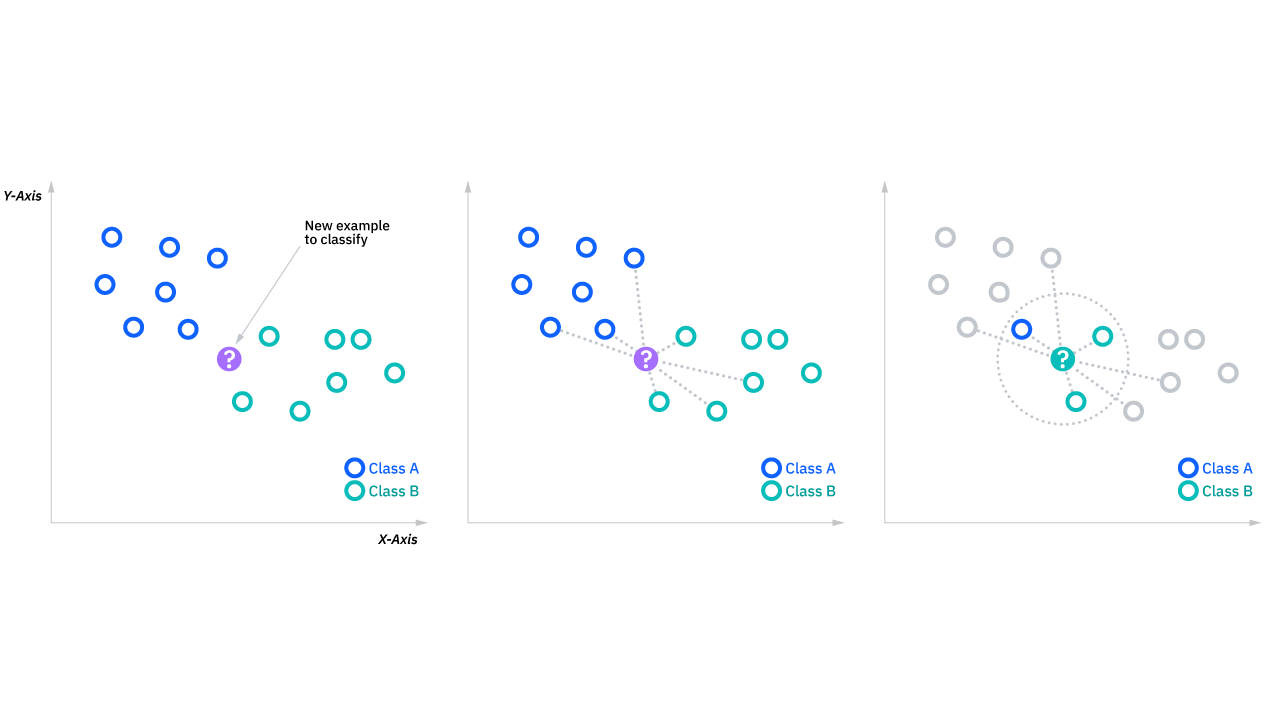

# **Code For KNN clasifier**



Step 1 : Import Necessary Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


Step 2 : Loading  the Dataset

In [ ]:
# Load the dataset
data = pd.read_csv('/content/iphone_purchase_records.csv')
# Display the first few rows
print(data.head())

# Summary of the dataset
print(data.info())
print(data.describe())


   Gender  Age  Salary  Purchase Iphone
0    Male   19   19000                0
1    Male   35   20000                0
2  Female   26   43000                0
3  Female   27   57000                0
4    Male   19   76000                0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
None
              Age         Salary  Purchase Iphone
count  400.000000     400.000000       400.000000
mean    37.655000   69742.500000         0.357500
std     10.482877   34096.960282         0.479864
min     18.000000   15000.000000         0.000000
25%     29.750000   43000.000000         0.000000
50%     37.000000   70000.0000

Step 3: Data Preprocessing
Cleaning t the data by handling missing values, converting categorical columns to numeric if necessary, and separating features and target variables.

In [ ]:
# Check for missing values
print(data.isnull().sum())

# the target variable is 'Purchased' and features are other columns (Age,salary,gender)
X = data.drop('Purchase Iphone', axis=1)
y = data['Purchase Iphone']

# Converting categorical data to numeric (if any)
X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64



# Scatter plot to visualize Age vs. Salary, colored by Purchase Iphone

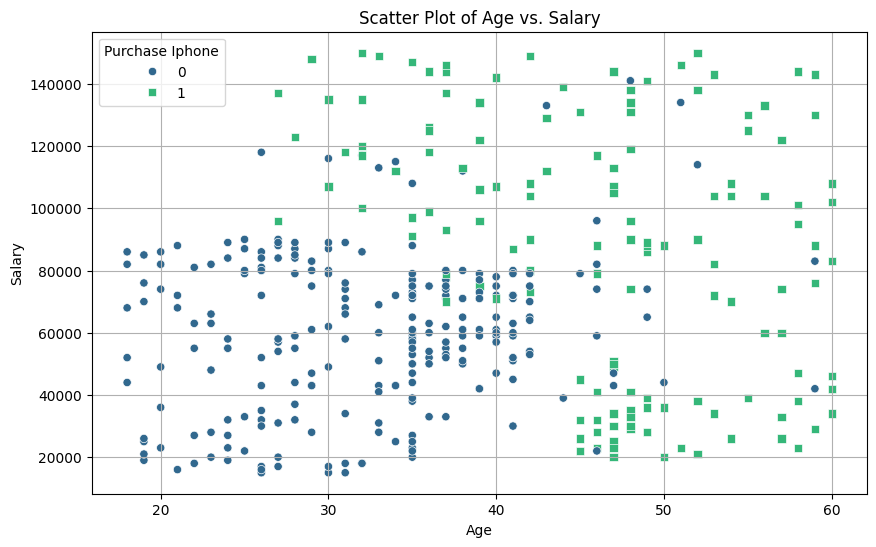

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Age',
    y='Salary',
    hue='Purchase Iphone',  # Color points by the target variable
    data=data,
    palette='viridis',
    style='Purchase Iphone',
    markers=['o', 's']
)
plt.title('Scatter Plot of Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Purchase Iphone')
plt.grid(True)
plt.show()


Step 4: Training the KNN Classifier:
Fiting  a KNN classifier to the training data and test it on the test data.

In [ ]:
# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  #  k=5

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

Step 5: Evaluating the KNN Model: metrics like accuracy, confusion matrix, and classification report to mesure model performance


Accuracy: 0.9166666666666666
Confusion Matrix:
[[68  5]
 [ 5 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        73
           1       0.89      0.89      0.89        47

    accuracy                           0.92       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



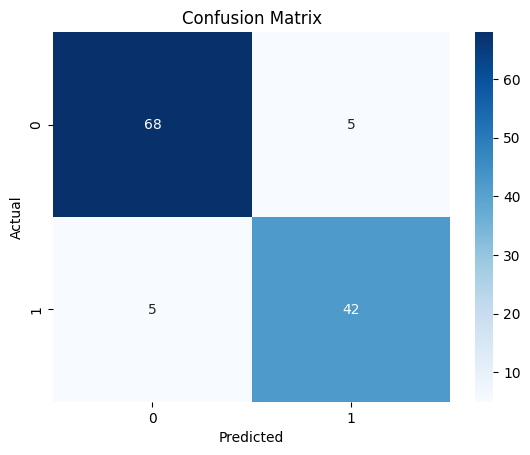

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


 Step 8 : Test the Model with New Data

In [ ]:
# Example new data for testing (Gender: Male=1, Female=0; Age: 28; Salary: 50000)
new_data = [[1, 28, 50000]]

# Preprocess the new data (e.g., scaling)
new_data_scaled = scaler.transform(new_data)

# Predict using the trained model
prediction = knn.predict(new_data_scaled)

# Interpret the result
if prediction[0] == 1:
    print("Prediction: The person will purchase an iPhone.")
else:
    print("Prediction: The person will not purchase an iPhone.")


Prediction: The person will not purchase an iPhone.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
